# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Fathurrahman Azhari
- **Email:** jagoitfathur@student.ub.ac.id / mc006d5y1401@student.devacademy.id
- **ID Dicoding:** Fathurrahman Azhari

## Menentukan Pertanyaan Bisnis


1.   Bagaimana pola penggunaan sepeda harian (distribusi penggunaan per jam) bervariasi antara hari kerja dan akhir pekan?
2.   Bagaimana perbandingan total penggunaan sepeda pada hari kerja (workingday), hari libur (holiday), dan akhir pekan (weekday) selama satu tahun penuh?
3.   Musim manakah yang menunjukkan penggunaan sepeda tertinggi dan terendah?



### KRITERIA 1: Data Bike Sharing
### KRITERIA 2: Analisis Data (Pertanyaan Bisnis -  Wrangling - EDA - Visual)
### KRITERIA 3: NOTEBOOK HARUS RAPI
### KRITERIA 4: DASHBOARD STREAMLIT
### Minimal 1 analysis lanjutan

###**DATA GATHERING**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/printlnfathur/Project1/refs/heads/main/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/printlnfathur/Project1/refs/heads/main/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


###**DATA ASSESING**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


###**DATA CLEANING**

In [14]:
# Ubah nama kolom agar lebih intuitif
day_df.rename(columns={
    'dteday': 'tanggal',
    'yr': 'tahun',
    'mnth': 'bulan',
    'hr': 'jam', # Sebenarnya tidak ada di day_df, tapi untuk konsistensi jika merge
    'weathersit': 'kondisi_cuaca',
    'temp': 'suhu_normalisasi',
    'atemp': 'suhu_rasa_normalisasi',
    'hum': 'kelembaban_normalisasi',
    'windspeed': 'kecepatan_angin_normalisasi',
    'cnt': 'jumlah_pengguna'
}, inplace=True)

# Konversi kolom tanggal ke tipe datetime
day_df['tanggal'] = pd.to_datetime(day_df['tanggal'])

# Ubah nilai numerik menjadi label kategorikal yang mudah dibaca
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['tahun'] = day_df['tahun'].map({
    0: 2011, 1: 2012
})
day_df['bulan'] = day_df['bulan'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['holiday'] = day_df['holiday'].map({
    0: 'Bukan Hari Libur', 1: 'Hari Libur'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
day_df['workingday'] = day_df['workingday'].map({
    0: 'Bukan Hari Kerja', 1: 'Hari Kerja'
})
day_df['kondisi_cuaca'] = day_df['kondisi_cuaca'].map({
    1: 'Cerah/Sedikit Berawan',
    2: 'Berkabut/Berawan',
    3: 'Salju Ringan/Hujan',
    4: 'Hujan Lebat/Badai Salju'
})

print("\n--- day_df Setelah Penyesuaian Kolom dan Konversi Kategorikal ---")
print(day_df.head())
print(day_df.info())


--- day_df Setelah Penyesuaian Kolom dan Konversi Kategorikal ---
   instant    tanggal  season  tahun bulan           holiday weekday  \
0        1 2011-01-01  Spring   2011   Jan  Bukan Hari Libur   Sabtu   
1        2 2011-01-02  Spring   2011   Jan  Bukan Hari Libur  Minggu   
2        3 2011-01-03  Spring   2011   Jan  Bukan Hari Libur   Senin   
3        4 2011-01-04  Spring   2011   Jan  Bukan Hari Libur  Selasa   
4        5 2011-01-05  Spring   2011   Jan  Bukan Hari Libur    Rabu   

         workingday          kondisi_cuaca  suhu_normalisasi  \
0  Bukan Hari Kerja       Berkabut/Berawan          0.344167   
1  Bukan Hari Kerja       Berkabut/Berawan          0.363478   
2        Hari Kerja  Cerah/Sedikit Berawan          0.196364   
3        Hari Kerja  Cerah/Sedikit Berawan          0.200000   
4        Hari Kerja  Cerah/Sedikit Berawan          0.226957   

   suhu_rasa_normalisasi  kelembaban_normalisasi  kecepatan_angin_normalisasi  \
0               0.363625          

In [15]:
hour_df.rename(columns={
    'dteday': 'tanggal',
    'yr': 'tahun',
    'mnth': 'bulan',
    'hr': 'jam',
    'weathersit': 'kondisi_cuaca',
    'temp': 'suhu_normalisasi',
    'atemp': 'suhu_rasa_normalisasi',
    'hum': 'kelembaban_normalisasi',
    'windspeed': 'kecepatan_angin_normalisasi',
    'cnt': 'jumlah_pengguna'
}, inplace=True)

# Konversi kolom tanggal ke tipe datetime
hour_df['tanggal'] = pd.to_datetime(hour_df['tanggal'])

# Ubah nilai numerik menjadi label kategorikal yang mudah dibaca
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['tahun'] = hour_df['tahun'].map({
    0: 2011, 1: 2012
})
hour_df['bulan'] = hour_df['bulan'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['holiday'] = hour_df['holiday'].map({
    0: 'Bukan Hari Libur', 1: 'Hari Libur'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Bukan Hari Kerja', 1: 'Hari Kerja'
})
hour_df['kondisi_cuaca'] = hour_df['kondisi_cuaca'].map({
    1: 'Cerah/Sedikit Berawan',
    2: 'Berkabut/Berawan',
    3: 'Salju Ringan/Hujan',
    4: 'Hujan Lebat/Badai Salju'
})

print("hour_df setelah pembersihan dan penyesuaian:")
print(hour_df.head())
print(hour_df.info())

hour_df setelah pembersihan dan penyesuaian:
   instant    tanggal  season  tahun bulan  jam           holiday weekday  \
0        1 2011-01-01  Spring   2011   Jan    0  Bukan Hari Libur   Sabtu   
1        2 2011-01-01  Spring   2011   Jan    1  Bukan Hari Libur   Sabtu   
2        3 2011-01-01  Spring   2011   Jan    2  Bukan Hari Libur   Sabtu   
3        4 2011-01-01  Spring   2011   Jan    3  Bukan Hari Libur   Sabtu   
4        5 2011-01-01  Spring   2011   Jan    4  Bukan Hari Libur   Sabtu   

         workingday          kondisi_cuaca  suhu_normalisasi  \
0  Bukan Hari Kerja  Cerah/Sedikit Berawan              0.24   
1  Bukan Hari Kerja  Cerah/Sedikit Berawan              0.22   
2  Bukan Hari Kerja  Cerah/Sedikit Berawan              0.22   
3  Bukan Hari Kerja  Cerah/Sedikit Berawan              0.24   
4  Bukan Hari Kerja  Cerah/Sedikit Berawan              0.24   

   suhu_rasa_normalisasi  kelembaban_normalisasi  kecepatan_angin_normalisasi  \
0                 0.2879  

In [16]:
day_df.describe()

,instant,tanggal,tahun,suhu_normalisasi,suhu_rasa_normalisasi,kelembaban_normalisasi,kecepatan_angin_normalisasi,casual,registered,jumlah_pengguna
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   instant                      731 non-null    int64         
 1   tanggal                      731 non-null    datetime64[ns]
 2   season                       731 non-null    object        
 3   tahun                        731 non-null    int64         
 4   bulan                        731 non-null    object        
 5   holiday                      731 non-null    object        
 6   weekday                      731 non-null    object        
 7   workingday                   731 non-null    object        
 8   kondisi_cuaca                731 non-null    object        
 9   suhu_normalisasi             731 non-null    float64       
 10  suhu_rasa_normalisasi        731 non-null    float64       
 11  kelembaban_normalisasi       731 non-null    

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   instant                      17379 non-null  int64         
 1   tanggal                      17379 non-null  datetime64[ns]
 2   season                       17379 non-null  object        
 3   tahun                        17379 non-null  int64         
 4   bulan                        17379 non-null  object        
 5   jam                          17379 non-null  int64         
 6   holiday                      17379 non-null  object        
 7   weekday                      17379 non-null  object        
 8   workingday                   17379 non-null  object        
 9   kondisi_cuaca                17379 non-null  object        
 10  suhu_normalisasi             17379 non-null  float64       
 11  suhu_rasa_normalisasi        17379 non-nu

In [19]:
hour_df.describe()

,instant,tanggal,tahun,jam,suhu_normalisasi,suhu_rasa_normalisasi,kelembaban_normalisasi,kecepatan_angin_normalisasi,casual,registered,jumlah_pengguna
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


###**EXPLORATORY DATA ANALYSIS**

In [20]:
# Buat kolom baru 'tipe_hari' di hour_df
hour_df['tipe_hari'] = hour_df['weekday'].apply(lambda x: 'Akhir Pekan' if x in ['Minggu', 'Sabtu'] else 'Hari Kerja')

In [21]:
# Verifikasi bahwa kolom 'tipe_hari' sudah ada dan berisi nilai yang benar
print("\nNilai unik 'tipe_hari' setelah dibuat:")
print(hour_df['tipe_hari'].unique())
print("\nhead() hour_df setelah 'tipe_hari' ditambahkan:")
print(hour_df.head())


Nilai unik 'tipe_hari' setelah dibuat:
['Akhir Pekan' 'Hari Kerja']

head() hour_df setelah 'tipe_hari' ditambahkan:
   instant    tanggal  season  tahun bulan  jam           holiday weekday  \
0        1 2011-01-01  Spring   2011   Jan    0  Bukan Hari Libur   Sabtu   
1        2 2011-01-01  Spring   2011   Jan    1  Bukan Hari Libur   Sabtu   
2        3 2011-01-01  Spring   2011   Jan    2  Bukan Hari Libur   Sabtu   
3        4 2011-01-01  Spring   2011   Jan    3  Bukan Hari Libur   Sabtu   
4        5 2011-01-01  Spring   2011   Jan    4  Bukan Hari Libur   Sabtu   

         workingday          kondisi_cuaca  suhu_normalisasi  \
0  Bukan Hari Kerja  Cerah/Sedikit Berawan              0.24   
1  Bukan Hari Kerja  Cerah/Sedikit Berawan              0.22   
2  Bukan Hari Kerja  Cerah/Sedikit Berawan              0.22   
3  Bukan Hari Kerja  Cerah/Sedikit Berawan              0.24   
4  Bukan Hari Kerja  Cerah/Sedikit Berawan              0.24   

   suhu_rasa_normalisasi  kelembab

In [23]:
# Kelompokkan data berdasarkan jam dan tipe_hari, lalu hitung rata-rata jumlah pengguna
usage_pattern_hourly = hour_df.groupby(['jam', 'tipe_hari'])['jumlah_pengguna'].mean().reset_index()

# Pisahkan data untuk hari kerja dan akhir pekan untuk visualisasi
hourly_usage_weekday = usage_pattern_hourly[usage_pattern_hourly['tipe_hari'] == 'Hari Kerja']
hourly_usage_weekend = usage_pattern_hourly[usage_pattern_hourly['tipe_hari'] == 'Akhir Pekan']

In [24]:
print("\n--- Data Pola Penggunaan Sepeda per Jam (Hari Kerja) ---")
print(hourly_usage_weekday.head())


--- Data Pola Penggunaan Sepeda per Jam (Hari Kerja) ---
   jam   tipe_hari  jumlah_pengguna
1    0  Hari Kerja        37.626692
3    1  Hari Kerja        17.464078
5    2  Hari Kerja         9.377953
7    3  Hari Kerja         5.188525
9    4  Hari Kerja         5.446939


In [25]:
print("\n--- Data Pola Penggunaan Sepeda per Jam (Akhir Pekan) ---")
print(hourly_usage_weekend.head())


--- Data Pola Penggunaan Sepeda per Jam (Akhir Pekan) ---
   jam    tipe_hari  jumlah_pengguna
0    0  Akhir Pekan        94.148325
2    1  Akhir Pekan        72.583732
4    2  Akhir Pekan        55.980676
6    3  Akhir Pekan        26.995215
8    4  Akhir Pekan         8.497585


In [26]:
# Buat kolom baru 'kategori_hari' di day_df
def categorize_day(row):
    if row['holiday'] == 'Hari Libur':
        return 'Hari Libur'
    elif row['workingday'] == 'Hari Kerja':
        return 'Hari Kerja (Non-Libur)'
    else: # weekday adalah Sabtu atau Minggu, dan bukan hari libur
        return 'Akhir Pekan (Non-Libur)'

day_df['kategori_hari'] = day_df.apply(categorize_day, axis=1)

In [27]:
# Kelompokkan data berdasarkan 'kategori_hari' dan hitung total jumlah pengguna
usage_by_day_category = day_df.groupby('kategori_hari')['jumlah_pengguna'].sum().reset_index()

In [28]:
# Urutkan untuk visualisasi yang lebih baik (misal: Hari Libur, Hari Kerja, Akhir Pekan)
desired_order = ['Hari Kerja (Non-Libur)', 'Akhir Pekan (Non-Libur)', 'Hari Libur']
usage_by_day_category['kategori_hari'] = pd.Categorical(usage_by_day_category['kategori_hari'], categories=desired_order, ordered=True)
usage_by_day_category = usage_by_day_category.sort_values('kategori_hari')


print("--- Data Total Penggunaan Sepeda per Kategori Hari ---")
print(usage_by_day_category)

--- Data Total Penggunaan Sepeda per Kategori Hari ---
             kategori_hari  jumlah_pengguna
1   Hari Kerja (Non-Libur)          2292410
0  Akhir Pekan (Non-Libur)           921834
2               Hari Libur            78435


In [29]:
# Kelompokkan data berdasarkan 'season' dan hitung total jumlah pengguna
usage_by_season = day_df.groupby('season')['jumlah_pengguna'].sum().reset_index()

# Urutkan hasilnya dari jumlah pengguna tertinggi ke terendah
usage_by_season_sorted = usage_by_season.sort_values(by='jumlah_pengguna', ascending=False)


print("--- Data Total Penggunaan Sepeda per Musim (Terurut) ---")
print(usage_by_season_sorted)

--- Data Total Penggunaan Sepeda per Musim (Terurut) ---
   season  jumlah_pengguna
0    Fall          1061129
2  Summer           918589
3  Winter           841613
1  Spring           471348


###**DATA VISUALIZATION**

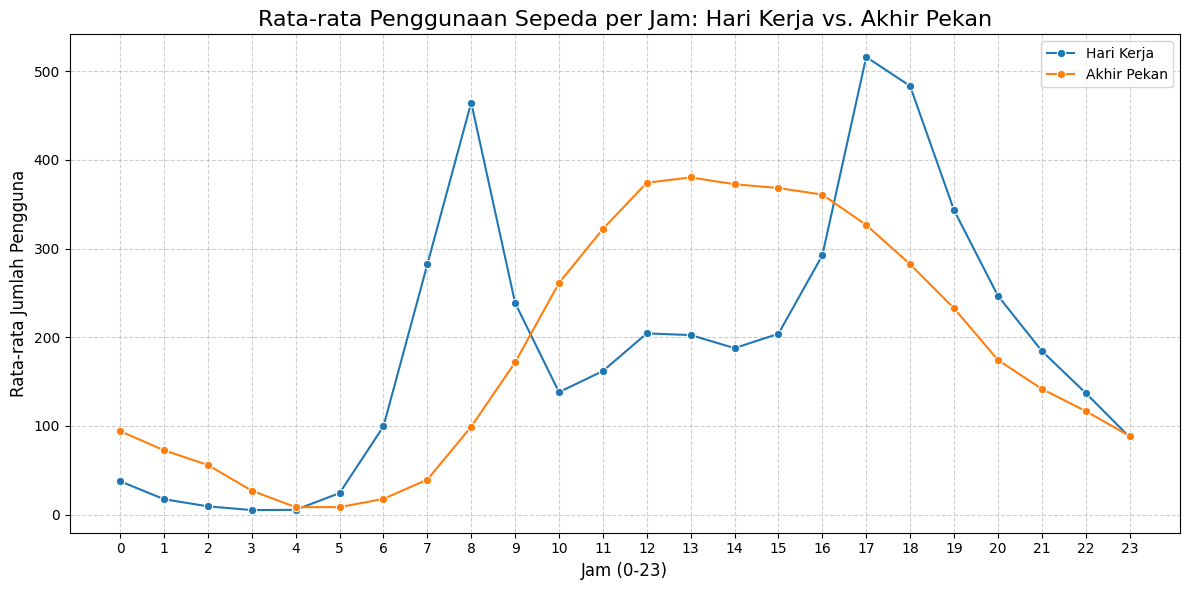

In [30]:
# Visualisasi Pola Penggunaan Sepeda per Jam (Hari Kerja vs. Akhir Pekan)
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='jam',
    y='jumlah_pengguna',
    data=hourly_usage_weekday,
    label='Hari Kerja',
    marker='o',
    color='#1f77b4' # Biru
)
sns.lineplot(
    x='jam',
    y='jumlah_pengguna',
    data=hourly_usage_weekend,
    label='Akhir Pekan',
    marker='o',
    color='#ff7f0e' # Oranye
)

plt.title('Rata-rata Penggunaan Sepeda per Jam: Hari Kerja vs. Akhir Pekan', fontsize=16)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna', fontsize=12)
plt.xticks(range(0, 24)) # Memastikan semua jam ditampilkan di sumbu X
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout() # Menyesuaikan tata letak agar tidak ada label yang tumpang tindih
plt.show()

<ipython-input-31-42ed591a7c51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


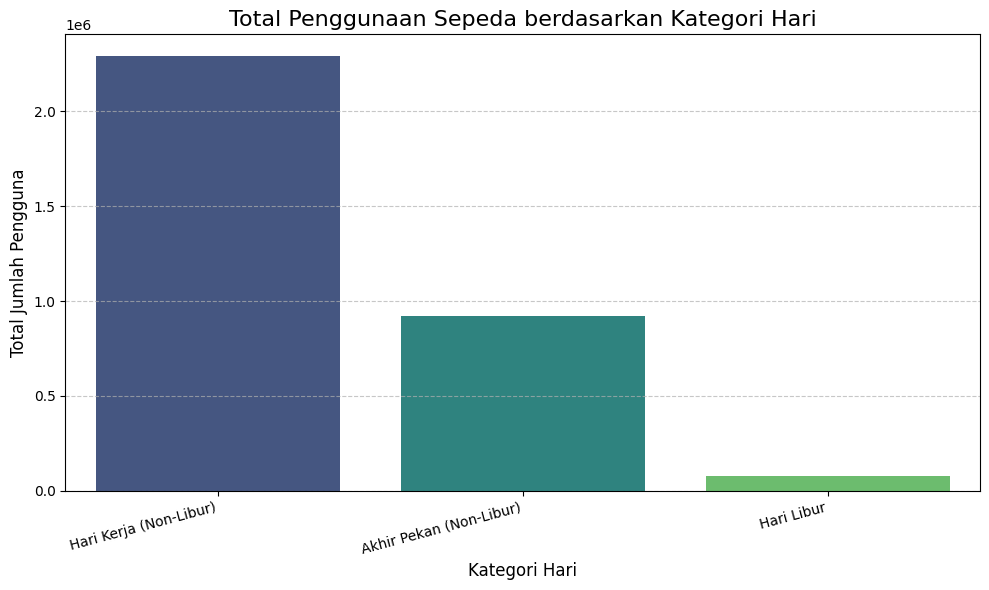

In [31]:
# Visualisasi Perbandingan Penggunaan Sepeda per Kategori Hari
plt.figure(figsize=(10, 6))
sns.barplot(
    x='kategori_hari',
    y='jumlah_pengguna',
    data=usage_by_day_category,
    palette='viridis' # Contoh palet warna
)

plt.title('Total Penggunaan Sepeda berdasarkan Kategori Hari', fontsize=16)
plt.xlabel('Kategori Hari', fontsize=12)
plt.ylabel('Total Jumlah Pengguna', fontsize=12)
plt.xticks(rotation=15, ha='right', fontsize=10) # Rotasi label X jika panjang
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-32-aea681d7df27>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


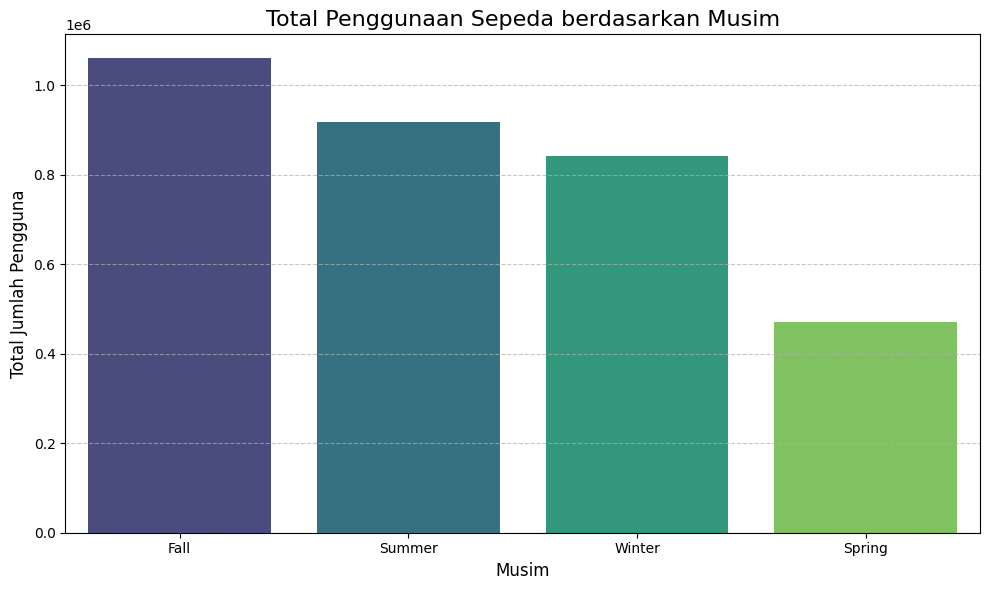

In [32]:
# Visualisasi Total Penggunaan Sepeda per Musim
plt.figure(figsize=(10, 6))
sns.barplot(
    x='season',
    y='jumlah_pengguna',
    data=usage_by_season_sorted, # Gunakan data yang sudah diurutkan
    palette='viridis' # Contoh palet warna
)

plt.title('Total Penggunaan Sepeda berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Jumlah Pengguna', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###**Time Series Decomposition**

In [33]:
# --- LANGKAH PENTING UNTUK TIME SERIES ANALYSIS ---
# Set kolom 'tanggal' sebagai indeks DataFrame
# Pastikan indeksnya unik dan terurut
day_df_ts = day_df.set_index('tanggal')

# Pilih kolom yang akan dianalisis, yaitu 'jumlah_pengguna'
# Jika ada missing value, time series decomposition bisa error.
# Kita sudah cek sebelumnya bahwa tidak ada missing value, jadi aman.
ts_data = day_df_ts['jumlah_pengguna']

# Lakukan Dekomposisi Time Series
# model='multiplicative' karena fluktuasi musiman mungkin meningkat dengan tren
# period=365 atau 366 (untuk tahun kabisat) karena kita melihat pola tahunan dari data harian
# Jika ingin melihat pola mingguan dari data harian, period=7
decomposition = seasonal_decompose(ts_data, model='multiplicative', period=365) # Menggunakan 365 hari untuk pola tahunan

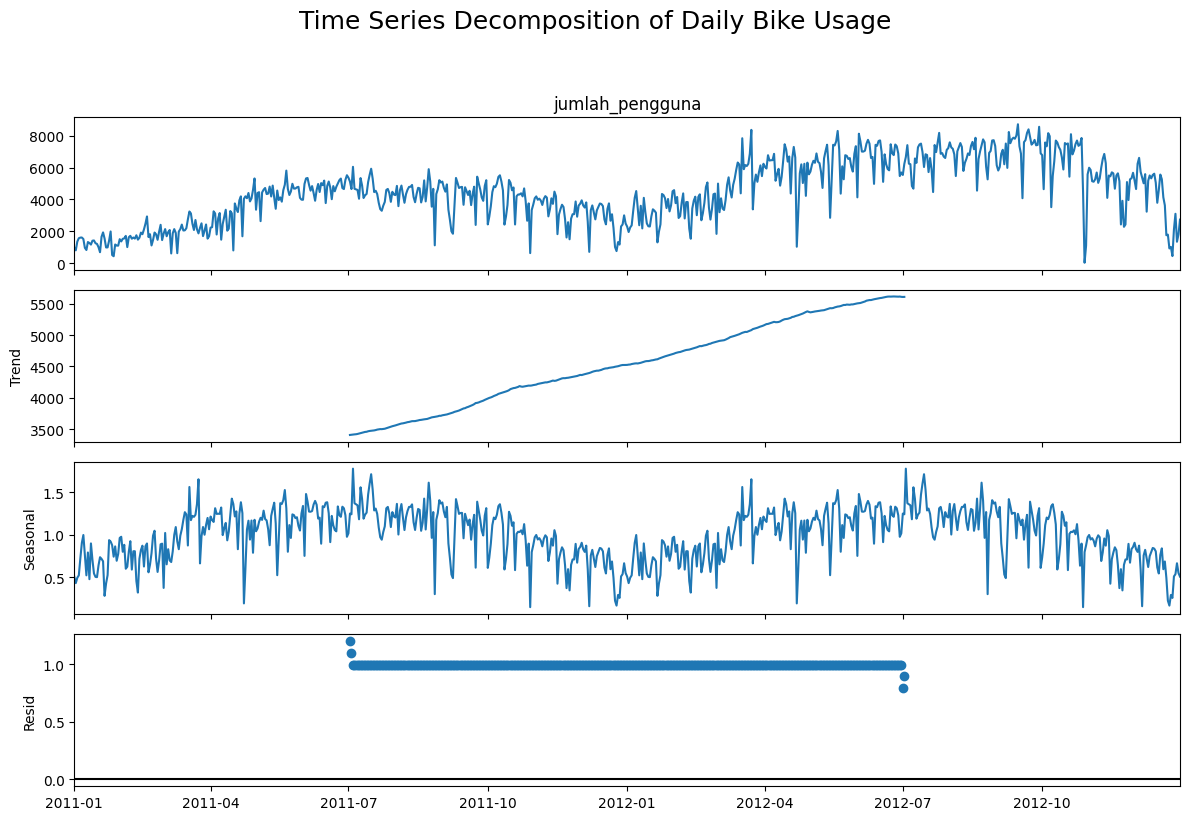

In [34]:
# Visualisasikan Hasil Dekomposisi
fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.suptitle('Time Series Decomposition of Daily Bike Usage', y=1.02, fontsize=18) # Menyesuaikan posisi judul utama
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Menyesuaikan layout agar judul tidak tumpang tindih
plt.show()

In [35]:
print("\n--- Komponen Tren ---")
print(decomposition.trend.head())


--- Komponen Tren ---
tanggal
2011-01-01   NaN
2011-01-02   NaN
2011-01-03   NaN
2011-01-04   NaN
2011-01-05   NaN
Name: trend, dtype: float64


In [36]:
print("\n--- Komponen Musiman ---")
print(decomposition.seasonal.head())


--- Komponen Musiman ---
tanggal
2011-01-01    0.508493
2011-01-02    0.432050
2011-01-03    0.494978
2011-01-04    0.523332
2011-01-05    0.722414
Name: seasonal, dtype: float64


In [37]:
print("\n--- Komponen Residual ---")
print(decomposition.resid.head())


--- Komponen Residual ---
tanggal
2011-01-01   NaN
2011-01-02   NaN
2011-01-03   NaN
2011-01-04   NaN
2011-01-05   NaN
Name: resid, dtype: float64


###**KESIMPULAN**

Kesimpulan
Berdasarkan analisis data penggunaan sepeda dari tahun 2011 hingga 2012, berikut adalah beberapa wawasan utama yang dapat ditarik:

## 1. Pola Penggunaan Sepeda Harian (Distribusi Penggunaan per Jam):
Hari Kerja: Penggunaan sepeda pada hari kerja menunjukkan dua puncak yang jelas: satu di pagi hari (sekitar jam 07:00-09:00) dan satu lagi di sore hari (sekitar jam 17:00-19:00). Pola ini sangat konsisten dengan jam sibuk komuter (pergi dan pulang kerja/sekolah), menunjukkan bahwa sepeda banyak digunakan sebagai moda transportasi harian.
Akhir Pekan: Pola penggunaan sepeda pada akhir pekan cenderung lebih merata sepanjang hari, dengan satu puncak yang lebih lebar di sekitar tengah hari (sekitar jam 12:00-16:00). Ini mengindikasikan penggunaan yang lebih bersifat rekreasi atau santai, tidak terikat jadwal kerja.
## 2. Hubungan Kategori Hari dengan Penggunaan Sepeda:
Hari Kerja (Non-Libur) menunjukkan total penggunaan sepeda tertinggi dibandingkan kategori hari lainnya. Ini menegaskan peran penting sepeda sebagai alat transportasi harian.
Akhir Pekan (Non-Libur) berada di posisi kedua, menunjukkan bahwa meskipun bukan hari kerja, sepeda tetap populer untuk aktivitas rekreasi atau santai.
Hari Libur memiliki total penggunaan terendah. Hal ini wajar karena sebagian besar orang tidak bepergian untuk bekerja, dan mungkin memilih aktivitas lain atau tetap di rumah. Ini juga bisa mengindikasikan kurangnya event atau infrastruktur yang mendukung penggunaan sepeda pada hari libur.
## 3. Penggunaan Sepeda Berdasarkan Musim:
Musim Gugur (Fall) menunjukkan total penggunaan sepeda tertinggi. Ini bisa disebabkan oleh kondisi cuaca yang paling nyaman (tidak terlalu panas, tidak terlalu dingin, atau terlalu hujan) yang mendukung aktivitas bersepeda di luar ruangan.
Musim Panas (Summer) berada di posisi kedua tertinggi, tetap menunjukkan penggunaan yang tinggi.
Musim Semi (Spring) berada di posisi ketiga.
Musim Dingin (Winter) adalah musim dengan total penggunaan sepeda terendah. Ini sangat logis mengingat kondisi cuaca yang keras (dingin, salju, angin) yang menghambat aktivitas bersepeda.

## Wawasan Tambahan dari Time Series Decomposition:
Tren (Trend): Selama periode 2011-2012, terdapat tren peningkatan yang jelas dalam penggunaan sepeda harian secara keseluruhan. Ini menunjukkan bahwa layanan bike-sharing semakin populer dan banyak digunakan seiring waktu.
Musiman (Seasonal): Adanya pola musiman tahunan yang kuat mengkonfirmasi bahwa penggunaan sepeda sangat dipengaruhi oleh perubahan musim (puncak di musim semi/panas/gugur, lembah di musim dingin).
Residual: Komponen sisa (residual) yang relatif kecil menunjukkan bahwa sebagian besar variasi dalam data dapat dijelaskan oleh tren dan musiman, dengan fluktuasi acak yang minimal. Ini mengindikasikan model dekomposisi cukup baik menangkap pola data.